In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#--------------------------------------

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix

from sklearn import tree


## Feature Engineering

In [2]:
# import the data set and show the first 5 rows:

df = pd.read_csv('../input/churn-risk-rate-hackerearth-ml/train.csv')
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
# the shape of the dataset:
df.shape

(36992, 25)

In [4]:
# Data information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
# the count of the missing values:

df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

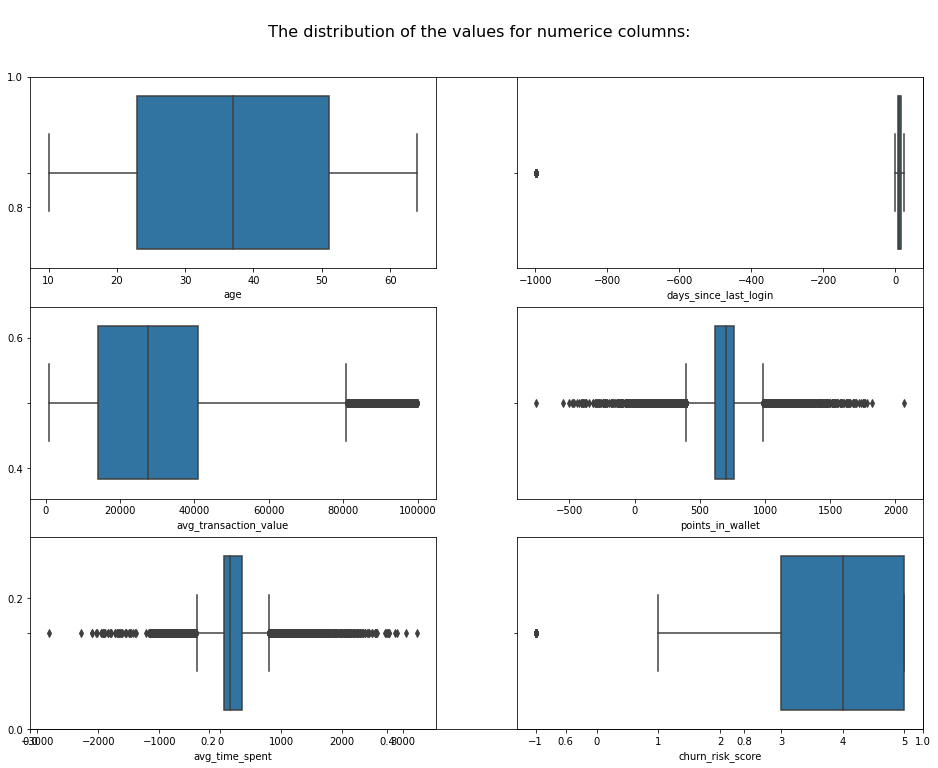

In [6]:
# the distribution of the values for numerice columns:

fig = plt.figure(figsize= (16, 12))
plt.title('\n The distribution of the values for numerice columns:\n \n', fontsize= 16)
axs = fig.subplots(nrows=3, ncols= 2)
sns.boxplot(data = df, x= 'age', ax = axs[0,0])
sns.boxplot(data = df, x= 'days_since_last_login',ax = axs[0,1])
sns.boxplot(data = df, x= 'avg_transaction_value',ax = axs[1,0])
sns.boxplot(data = df, x= 'points_in_wallet', ax= axs[1,1])
sns.boxplot(data = df, x= 'avg_time_spent', ax= axs[2,0])
sns.boxplot(data = df, x= 'churn_risk_score', ax= axs[2,1])
plt.show()

In [7]:
# replace the nigative values in "days_since_last_login" column with the median of the positive values:

df.loc[df['days_since_last_login'] < 0, 'days_since_last_login'] = df['days_since_last_login'].loc[df['days_since_last_login'] > 0].median()

In [8]:
# replace the nigatice values in "avg_time_spent" column with the median of the positive values:

df.loc[df['avg_time_spent'] < 0, 'avg_time_spent'] = df['avg_time_spent'].loc[df['avg_time_spent'] > 0].median()

In [9]:
# replace the nigative values in "points_in_wallet" column with the median of the positive values:


df.loc[df['points_in_wallet'] < 0, 'points_in_wallet'] = df['points_in_wallet'].loc[df['points_in_wallet'] > 0].median() 

In [10]:
# The "churn_risk_score" has some values with -1 score, according to the data resorce these values are 1 score but they ara mislabeled
# so we will replace the score -1 with 1 score:

df.loc[df['churn_risk_score'] == -1, 'churn_risk_score'] = 1

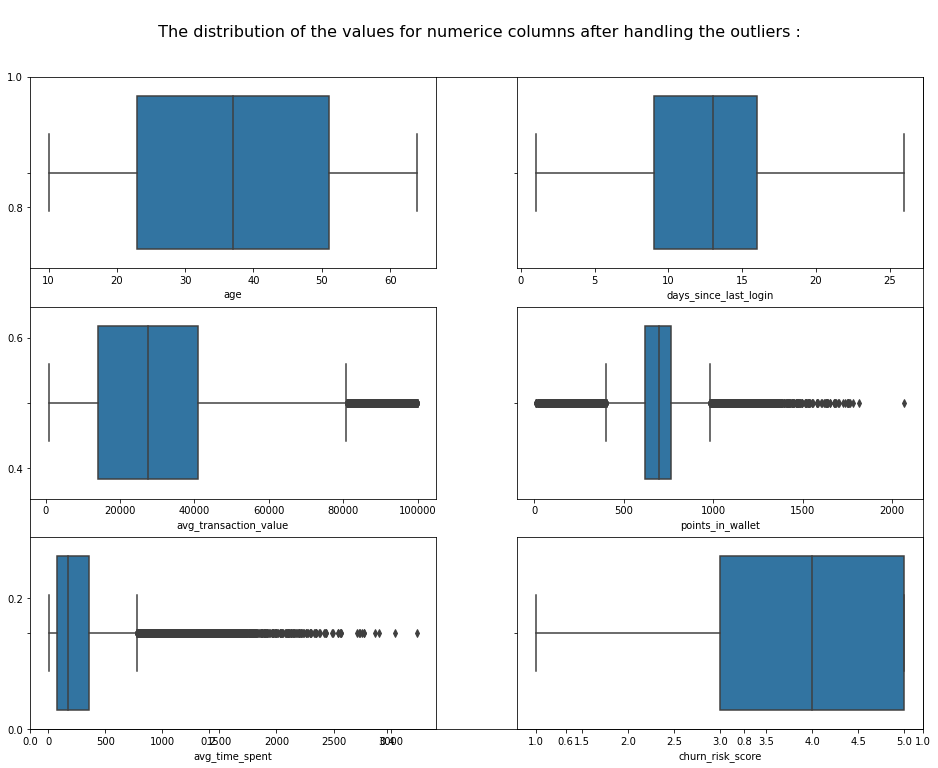

In [11]:
# the distribution of the numerice columns after handling the outliers:

fig = plt.figure(figsize= (16, 12))
plt.title('\n The distribution of the values for numerice columns after handling the outliers :\n \n' , fontsize= 16)
axs = fig.subplots(nrows=3, ncols= 2)
sns.boxplot(data = df, x= 'age', ax = axs[0,0])
sns.boxplot(data = df, x= 'days_since_last_login',ax = axs[0,1])
sns.boxplot(data = df, x= 'avg_transaction_value',ax = axs[1,0])
sns.boxplot(data = df, x= 'points_in_wallet', ax= axs[1,1])
sns.boxplot(data = df, x= 'avg_time_spent', ax= axs[2,0])
sns.boxplot(data = df, x= 'churn_risk_score', ax= axs[2,1])
plt.show()

In [12]:
# fill the missing values in "points_in_wallet" column withe the median:

df['points_in_wallet'].fillna(df['points_in_wallet'].median(), inplace= True)

In [13]:
# the values count for "preferred_offer _types" columns:

df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [14]:
# fill the missing valus in "preferred_offer_types" with the value "Without Offers":

df['preferred_offer_types'].fillna('Without Offers', inplace = True)

In [15]:
# drop unnecessary columns:

df.drop(columns = ['customer_id', 'Name','referral_id', 'joining_date', 'last_visit_time', 'security_no', 'region_category'], inplace = True)

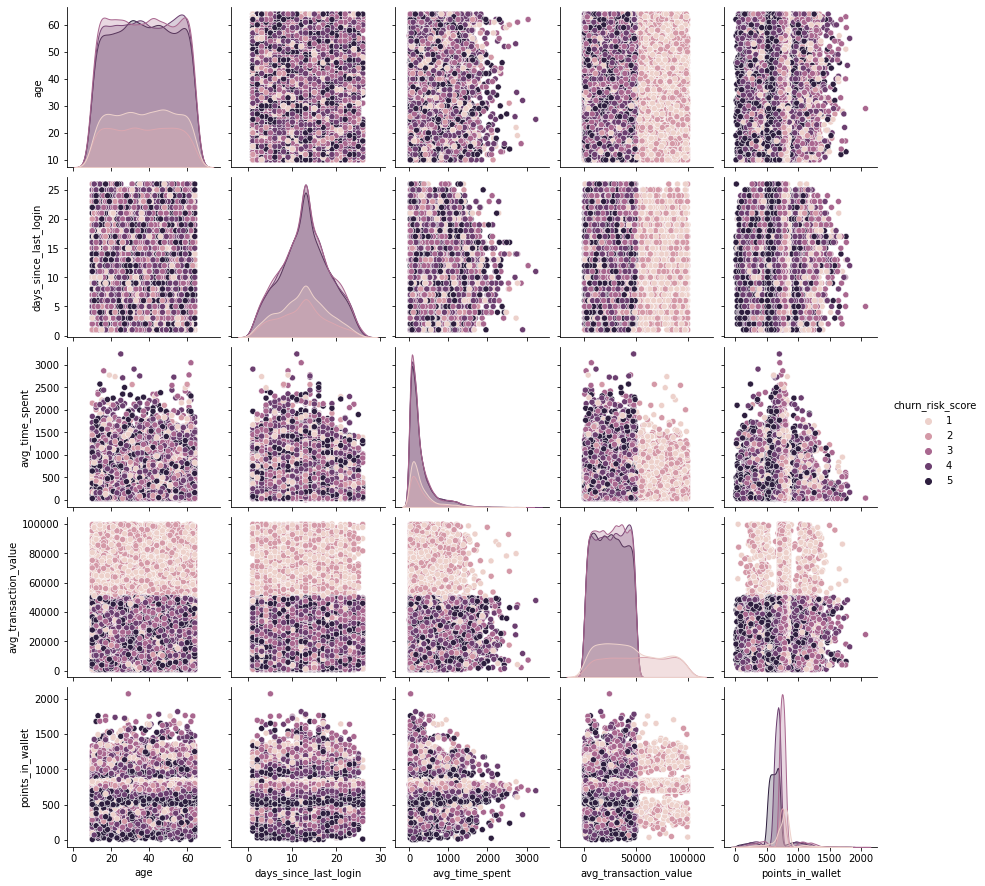

In [16]:
# Pair plot for numerice columns:

sns.pairplot(df, hue = 'churn_risk_score')
plt.show()

In [17]:
# Split the data:

X = df.drop(columns =['churn_risk_score'])
y = df['churn_risk_score']

# encode the categorical values:

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 0)

## Decision Tree Model

In [18]:
#pipeline for the model:

pipe = Pipeline([('scaler', StandardScaler(with_mean= False)),
                ('classifier', DecisionTreeClassifier())])

# the GridSearchCV to detremine the best parameters for the model:

parameters = {'scaler':[StandardScaler(with_mean= False), Normalizer()] ,
              'classifier__max_depth': [2, 4, 8, 10, 12],
             'classifier__min_samples_leaf':[1, 2, 3, 5, 7, 9, 13],
             'classifier__min_samples_split': [2, 3 , 5, 7, 9,13]}
grid = GridSearchCV(pipe, parameters, cv = 2 ,n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 4, 8, 10, 12],
                         'classifier__min_samples_leaf': [1, 2, 3, 5, 7, 9, 13],
                         'classifier__min_samples_split': [2, 3, 5, 7, 9, 13],
                         'scaler': [StandardScaler(with_mean=False),
                                    Normalizer()]})

In [19]:
# the best parameters :

best_param = grid.best_params_
print(best_param)

{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 7, 'scaler': StandardScaler(with_mean=False)}


In [20]:
# the change of the parameters according to the different parameteres:

results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_scaler,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,2.632005,0.014182,0.500509,0.028609,2,1,2,StandardScaler(with_mean=False),"{'classifier__max_depth': 2, 'classifier__min_...",0.574806,0.577389,0.576097,0.001291,337
1,1.849586,0.012781,0.564295,0.066538,2,1,2,Normalizer(),"{'classifier__max_depth': 2, 'classifier__min_...",0.547934,0.547934,0.547934,0.000000,379
2,2.149555,0.003112,0.483158,0.001448,2,1,3,StandardScaler(with_mean=False),"{'classifier__max_depth': 2, 'classifier__min_...",0.574806,0.577389,0.576097,0.001291,337
3,1.602395,0.002726,0.658545,0.000681,2,1,3,Normalizer(),"{'classifier__max_depth': 2, 'classifier__min_...",0.547934,0.547934,0.547934,0.000000,379
4,2.270846,0.015086,0.510975,0.054093,2,1,5,StandardScaler(with_mean=False),"{'classifier__max_depth': 2, 'classifier__min_...",0.574806,0.577389,0.576097,0.001291,337


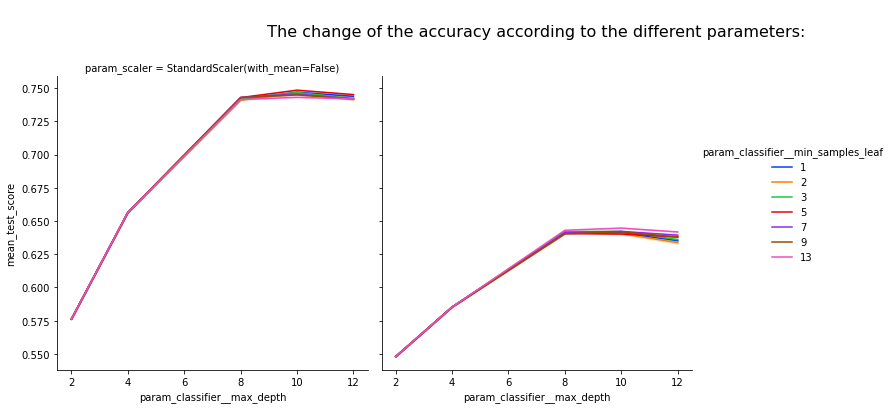

In [21]:
# the change of the accuracy according to the different parameters:

sns.relplot(data = results,
            kind = 'line',
            x = 'param_classifier__max_depth',
            y = 'mean_test_score',
            hue = 'param_classifier__min_samples_leaf',
            col = 'param_scaler',
            palette= 'bright')
plt.title('\n The change of the accuracy according to the different parameters: \n \n', fontsize= 16)
plt.show()

In [22]:
# the scores report:
pred = grid.predict(X_test)
scores_report = classification_report(y_test, pred)
print(scores_report)

              precision    recall  f1-score   support

           1       0.70      0.58      0.63      1270
           2       0.79      0.60      0.68       883
           3       0.82      0.96      0.89      3432
           4       0.76      0.49      0.60      3384
           5       0.68      0.91      0.78      3239

    accuracy                           0.75     12208
   macro avg       0.75      0.71      0.72     12208
weighted avg       0.75      0.75      0.74     12208



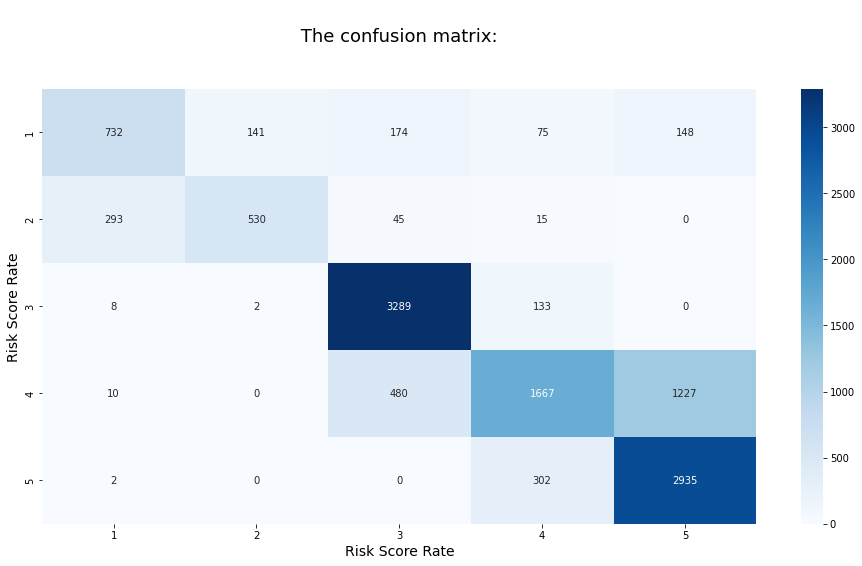

In [23]:
# the confusion matrix:

cm = confusion_matrix(y_test, pred, )
plt.figure(figsize=(16,8))
label = y.sort_values().unique()
sns.heatmap(cm, annot= True, cmap= 'Blues', xticklabels= label, yticklabels= label, fmt='g')
plt.title('\n The confusion matrix: \n \n', fontsize = 18)
plt.xlabel('Risk Score Rate', fontsize = 14)
plt.ylabel('Risk Score Rate', fontsize = 14)
plt.show()

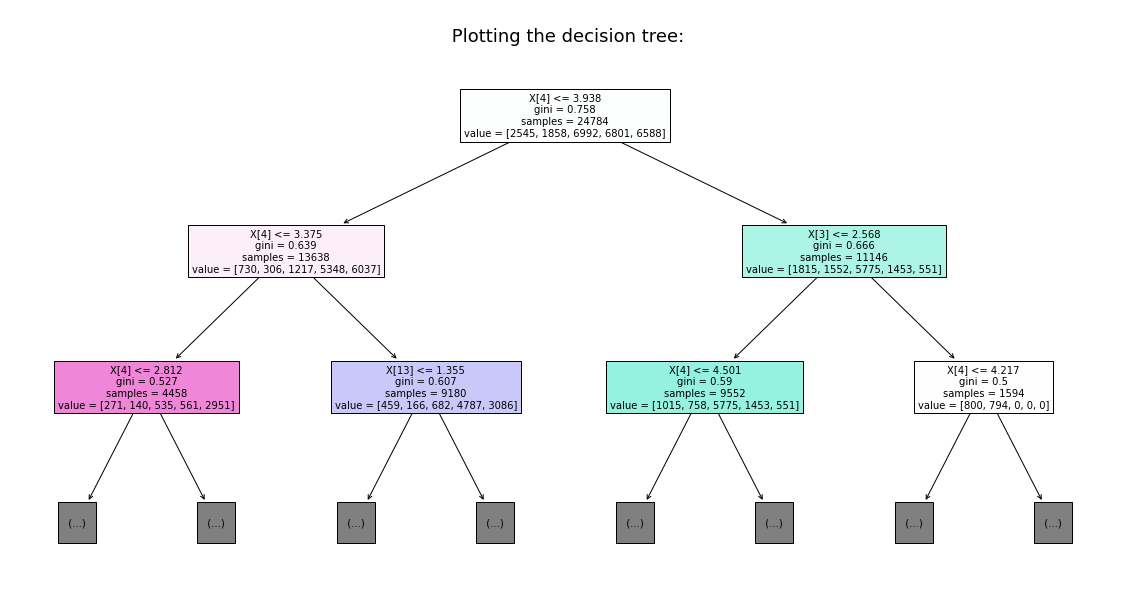

In [24]:
# plot the decision tree:

plt.figure(figsize= (20, 10))
tree.plot_tree(grid.best_estimator_[1], max_depth= 2 , filled=True, fontsize=10)
plt.title('\n Plotting the decision tree:', fontsize = 18)
plt.show()